<a href="https://colab.research.google.com/github/shantanu-workspace/Bootcamp-Git/blob/main/HCcity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

=== Step 1: Loading the dataset ===
Dataset loaded successfully!
  name_of_city  state_code      state_name  dist_code  population_total  \
0      Abohar            3          PUNJAB          9            145238   
1    Achalpur           27     MAHARASHTRA          7            112293   
2    Adilabad           28  ANDHRA PRADESH          1            117388   
3   Adityapur           20       JHARKHAND         24            173988   
4       Adoni           28  ANDHRA PRADESH         21            166537   

   population_male  population_female  0-6_population_total  \
0            76840              68398                 15870   
1            58256              54037                 11810   
2            59232              58156                 13103   
3            91495              82493                 23042   
4            82743              83794                 18406   

   0-6_population_male  0-6_population_female  ...  literates_female  \
0                 8587           

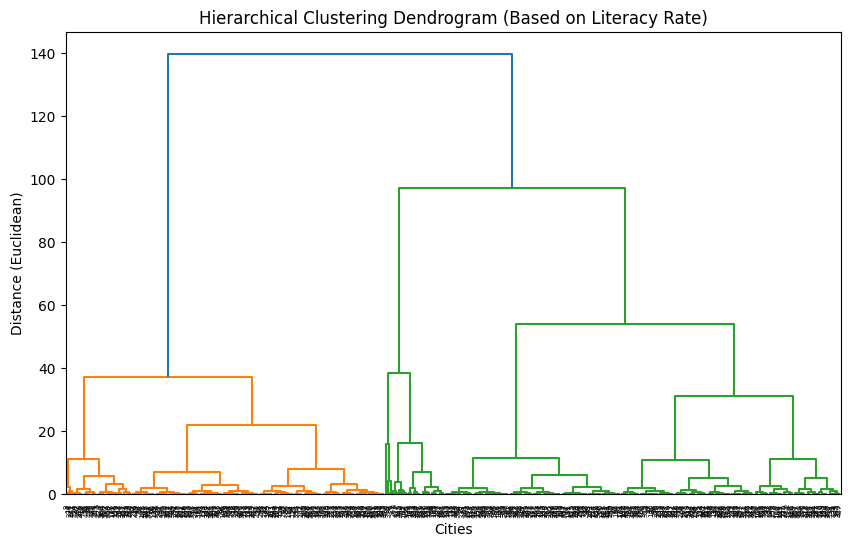

Dendrogram plotted. You can visually choose number of clusters by observing big vertical gaps.

=== Step 5: Forming 5 clusters ===
Clusters assigned successfully!

=== Step 6: Final Cluster Groups ===

--- Cluster 1 ---
Total Cities: 203
Average Literacy Rate: 90.45
Cities in this cluster:
['Achalpur ', 'Agartala ', 'Ahmadabad ', 'Ahmadnagar ', 'Aizawl ', 'Ajmer ', 'Akola ', 'Alandur ', 'Alappuzha ', 'Ambala ']

--- Cluster 2 ---
Total Cities: 5
Average Literacy Rate: 59.65
Cities in this cluster:
['Agra ', 'Amroha ', 'Bagaha ', 'Rampur ', 'Sambhal ']

--- Cluster 3 ---
Total Cities: 33
Average Literacy Rate: 72.73
Cities in this cluster:
['Adoni ', 'Aligarh ', 'Bahraich ', 'Bareilly ', 'Biharsharif ', 'Budaun ', 'Chandausi ', 'Chilakaluripet ', 'Churu ', 'Dabgram ']

--- Cluster 4 ---
Total Cities: 112
Average Literacy Rate: 85.66
Cities in this cluster:
['Allahabad ', 'Alwar ', 'Ambur ', 'Amritsar ', 'Asansol ', 'Aurangabad ', 'Azamgarh ', 'Bagalkot ', 'Ballia ', 'Bansberia ']

--- C

In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

# Step 1: Load the dataset
print("=== Step 1: Loading the dataset ===")
df = pd.read_csv("cities_r2.csv")
print("Dataset loaded successfully!")
print(df.head())
print(f"\nTotal cities in dataset: {len(df)}\n")

# Step 2: Select the column for clustering
print("=== Step 2: Selecting feature for clustering ===")
X = df[['effective_literacy_rate_total']]
print("Using column: effective_literacy_rate_total\n")

# Step 3: Create linkage matrix using Ward’s method
print("=== Step 3: Computing linkage matrix (Ward’s method) ===")
Z = linkage(X, method='ward')
print("Linkage matrix created successfully!\n")

# Step 4: Plot the dendrogram
print("=== Step 4: Displaying dendrogram ===")
plt.figure(figsize=(10, 6))
dendrogram(Z)
plt.title("Hierarchical Clustering Dendrogram (Based on Literacy Rate)")
plt.xlabel("Cities")
plt.ylabel("Distance (Euclidean)")
plt.show()
print("Dendrogram plotted. You can visually choose number of clusters by observing big vertical gaps.\n")

# Step 5: Create clusters (you can change 3 to 4 or 5)
n_clusters = 5
print(f"=== Step 5: Forming {n_clusters} clusters ===")
clusters = fcluster(Z, n_clusters, criterion='maxclust')

# Step 6: Add cluster info back to the DataFrame
df['Cluster'] = clusters
print("Clusters assigned successfully!\n")

# Step 7: Show final grouped results
print("=== Step 6: Final Cluster Groups ===")
for i in range(1, n_clusters + 1):
    group = df[df['Cluster'] == i]
    print(f"\n--- Cluster {i} ---")
    print(f"Total Cities: {len(group)}")
    print("Average Literacy Rate:", round(group['effective_literacy_rate_total'].mean(), 2))
    print("Cities in this cluster:")
    print(group['name_of_city'].head(10).tolist())  # Show first 10 cities per cluster

print("\n=== Clustering Completed Successfully ===")



✅ Dataset loaded successfully!

   AtBat  Hits  HmRun  Runs  RBI  Walks  Years  CAtBat  CHits  CHmRun  CRuns  \
0    293    66      1    30   29     14      1     293     66       1     30   
1    315    81      7    24   38     39     14    3449    835      69    321   
2    479   130     18    66   72     76      3    1624    457      63    224   
3    496   141     20    65   78     37     11    5628   1575     225    828   
4    321    87     10    39   42     30      2     396    101      12     48   

   CRBI  CWalks League Division  PutOuts  Assists  Errors  Salary NewLeague  
0    29      14      A        E      446       33      20     NaN         A  
1   414     375      N        W      632       43      10   475.0         N  
2   266     263      A        W      880       82      14   480.0         A  
3   838     354      N        E      200       11       3   500.0         N  
4    46      33      N        E      805       40       4    91.5         N  


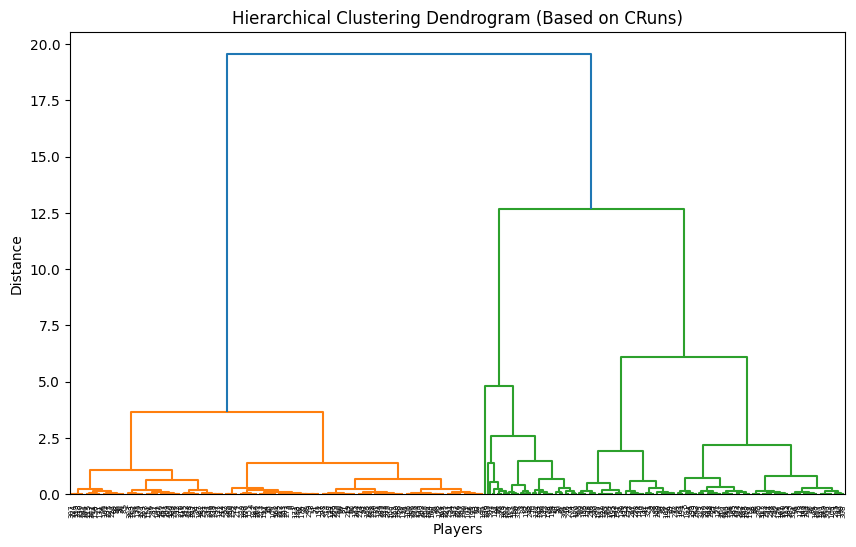


============= SAMPLE PLAYER CLUSTERS =============

   CRuns  Cluster
0     30        1
1    321        4
2    224        1
3    828        2
4     48        1
5    501        4
6     30        1
7     41        1
8     32        1
9    784        3

✅ Hierarchical Clustering Applied Successfully!
Players have been grouped based on their Career Runs (CRuns).
Players in the same cluster have similar run performance.



In [ ]:
# ===== HIERARCHICAL CLUSTERING ON HITTERS DATASET =====

# Step 1: Import all the required libraries
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Step 2: Load the dataset
df = pd.read_csv("Hitters.csv")
print("\n✅ Dataset loaded successfully!\n")
print(df.head())

# Step 3: Pre-processing
# Encode text columns (Label Encoding)
label_encoder = LabelEncoder()
for column in df.select_dtypes(include='object').columns:
    df[column] = label_encoder.fit_transform(df[column].astype(str))

# Step 4: Select the column for clustering
X = df[['CRuns']].dropna()

# Step 5: Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 6: Apply Hierarchical Clustering
Z = linkage(X_scaled, method='ward')

# Step 7: Visualize the Dendrogram
plt.figure(figsize=(10, 6))
plt.title("Hierarchical Clustering Dendrogram (Based on CRuns)")
plt.xlabel("Players")
plt.ylabel("Distance")
dendrogram(Z)
plt.show()

# Step 8: Form clusters (you can change 't' to change number of clusters)
clusters = fcluster(Z, t=4, criterion='maxclust')

# Step 9: Add cluster info to dataset
df['Cluster'] = clusters

# Step 10: Display sample output
print("\n============= SAMPLE PLAYER CLUSTERS =============\n")
print(df[['CRuns', 'Cluster']].head(10))

# Step 11: Meaningful output
print("\n✅ Hierarchical Clustering Applied Successfully!")
print("Players have been grouped based on their Career Runs (CRuns).")
print("Players in the same cluster have similar run performance.\n")


In [ ]:
# ===== HIERARCHICAL CLUSTERING ON 50 STARTUPS DATASET =====

# Step 1: Import all the required libraries
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Step 2: Load the dataset
df = pd.read_csv("50_Startups.csv")
print("\n✅ Dataset loaded successfully!\n")
print(df.head())

# Step 3: Pre-processing (Label Encoding)
label_encoder = LabelEncoder()
for column in df.select_dtypes(include='object').columns:
    df[column] = label_encoder.fit_transform(df[column].astype(str))

# Step 4: Select the column for clustering
X = df[['Profit']].dropna()

# Step 5: Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 6: Apply Hierarchical Clustering
Z = linkage(X_scaled, method='ward')

# Step 7: Visualize the Dendrogram
plt.figure(figsize=(10, 6))
plt.title("Hierarchical Clustering Dendrogram (Based on Profit)")
plt.xlabel("Startups")
plt.ylabel("Distance")
dendrogram(Z)
plt.show()

# Step 8: Form clusters (change 't' to change number of clusters)
clusters = fcluster(Z, t=3, criterion='maxclust')

# Step 9: Add cluster info to dataset
df['Cluster'] = clusters

# Step 10: Display sample output
print("\n============= SAMPLE STARTUP CLUSTERS =============\n")
print(df[['Profit', 'Cluster']].head(10))

# Step 11: Meaningful output
print("\n✅ Hierarchical Clustering Applied Successfully!")
print("Startups have been grouped based on their PROFIT values.")
print("Companies in the same cluster have similar profit performance.\n")
